In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

no_gtx_df = pd.read_csv("kernel_invocations_no_gtx.csv")
no_gtx_df["scenario"] = "no_gtx"
gtx_df = pd.read_csv("kernel_invocations_gtx.csv")
gtx_df["scenario"] = "gtx"
dcf_df = pd.read_csv("kernel_invocations_dcf.csv")
dcf_df["scenario"] = "dcf"

df = pd.concat([no_gtx_df, gtx_df, dcf_df])

# remove the kernel containing name "distribution"
df = df[~df["kernel_name"].str.contains("distribution")]

In [15]:
df.groupby(["kernel_name", "scenario"])["duration_ns"].count()

kernel_name                                                                                                                                            scenario
sm90_xmma_gemm_bf16bf16_bf16f32_f32_nn_n_tilesize128x128x64_warpgroupsize1x1x1_execute_segment_k_off_kernel__5x_cublas                                 gtx          930
                                                                                                                                                       no_gtx       770
switch_handle_setter                                                                                                                                   dcf         1588
void at::native::vectorized_elementwise_kernel<(int)4, at::native::CUDAFunctor_add<c10::BFloat16>, std::array<char *, (unsigned long)3>>(int, T2, T3)  gtx         1086
                                                                                                                                                       no_gtx      1282


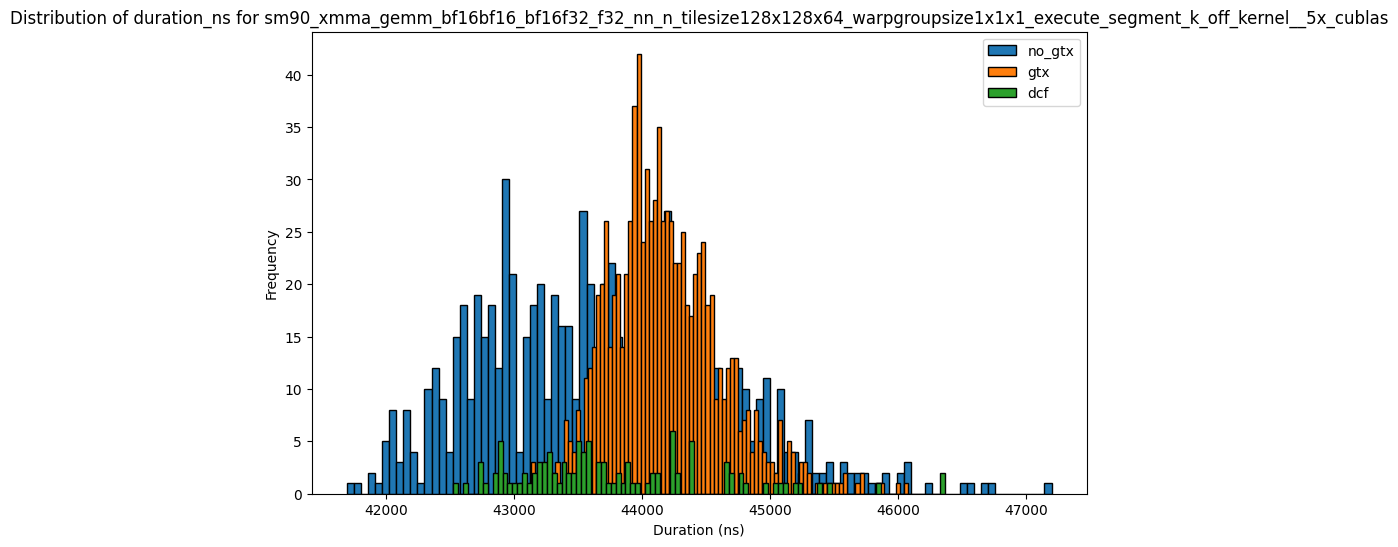

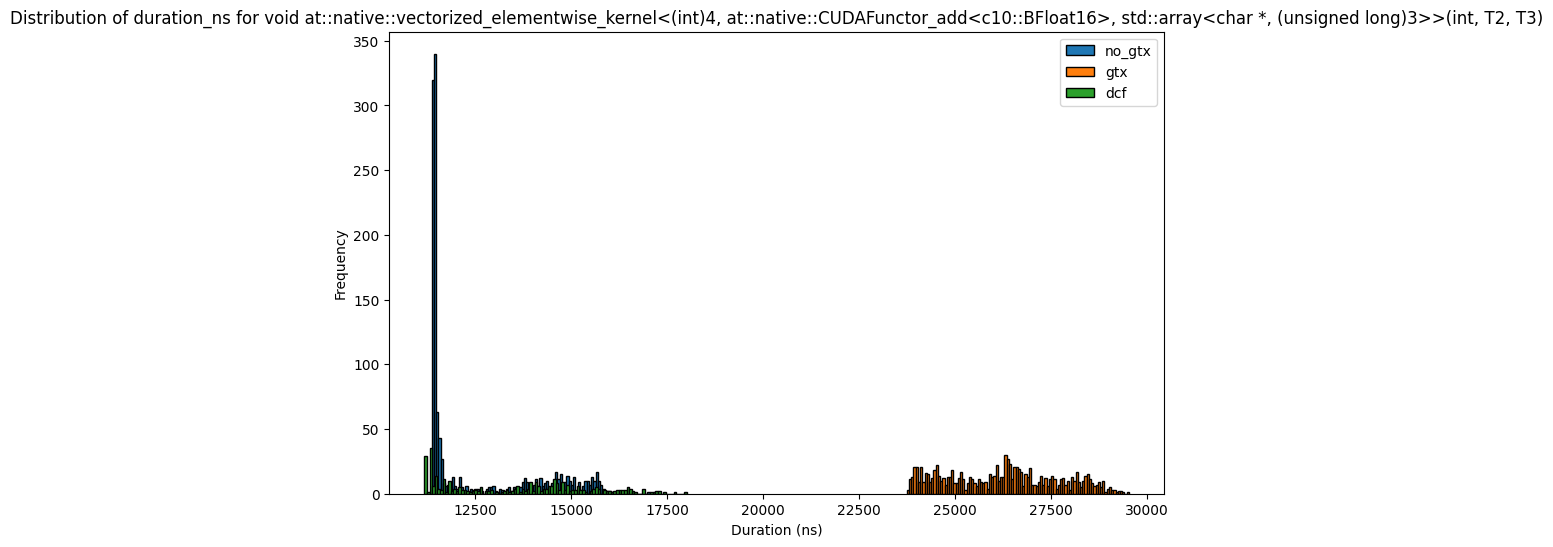

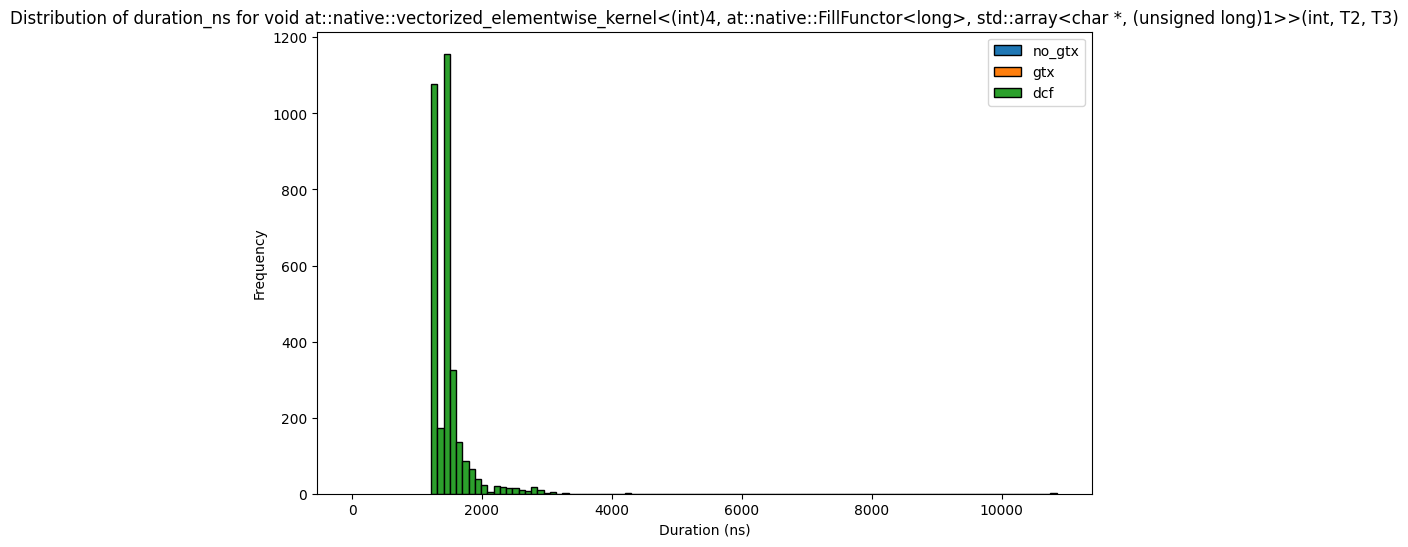

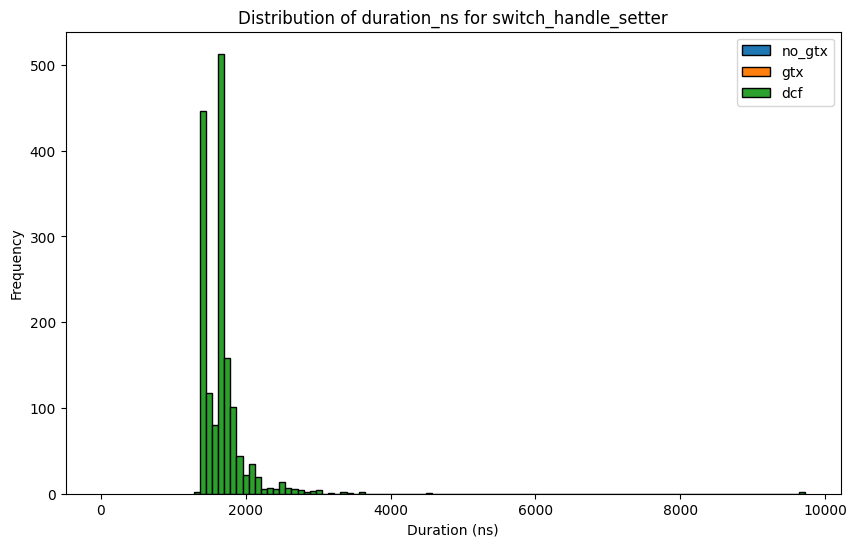

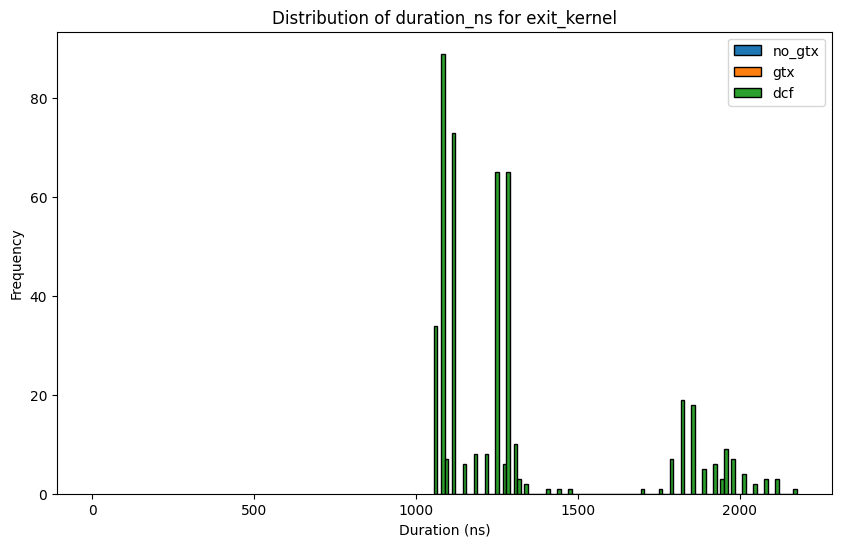

In [10]:
# plot the distribution of duration_ns for each kernel

for kernel in df["kernel_name"].unique():
    plt.figure(figsize=(10, 6))

    for scenario in df["scenario"].unique():
        plt.hist(df[(df["kernel_name"] == kernel)
                    & (df["scenario"] == scenario)]["duration_ns"],
                 bins=100,
                 edgecolor="black",
                 label=scenario)
    plt.title(f"Distribution of duration_ns for {kernel}")
    plt.xlabel("Duration (ns)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()